# Executive Sumary 

## Purpose:
This project aims to analyze the sales of 45 Walmart stores between 2010-01-10' to '2012-12-10'

## Goal

Use 143 weeks of data to find a time series model that will allow us to predict weekly sales.

# Plan
Acquire and prepare Walmart sales found on kaggle.com. 
Analysis based on Time Series modeling and ran through the data pipeline.
Use vizuals to understand the data and find the best performing Model.



In [1]:
import pandas as pd
import numpy as np
import os

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import wrangle
import viz
import model 
from viz import plot_samples
from model import append_eval_df
# from model import plot_and_eval

%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# supress scientific notation
# np.set_printoptions(suppress=True)
plt.rcParams["axes.formatter.limits"] = (-5, 12)
# pd.options.display.float_format = '{:.2f}'.format

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('fivethirtyeight')



# Acquire Walmart Weekly Sales

In [2]:
# Acquire  
df = wrangle.get_walmart_data()
df.head(2)

Data is cached. Reading data from .csv file.
Acquisition complete


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


## Prepare

In [3]:
# Prepare
df = wrangle.new_walmart_data(df)
df.head(2)

,store,weekly_sales,holiday_flag,temperature,fuel_price,consumer_price_index,unemployment
date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-05,10,2193048.75,0,54.34,2.962,126.442065,9.765


## Split



In [4]:
# Split data into train and test 
# Data does not contain more than two cycles
train, test = wrangle.split_walmart_data(df)

((3861, 1), (2574, 1), None)

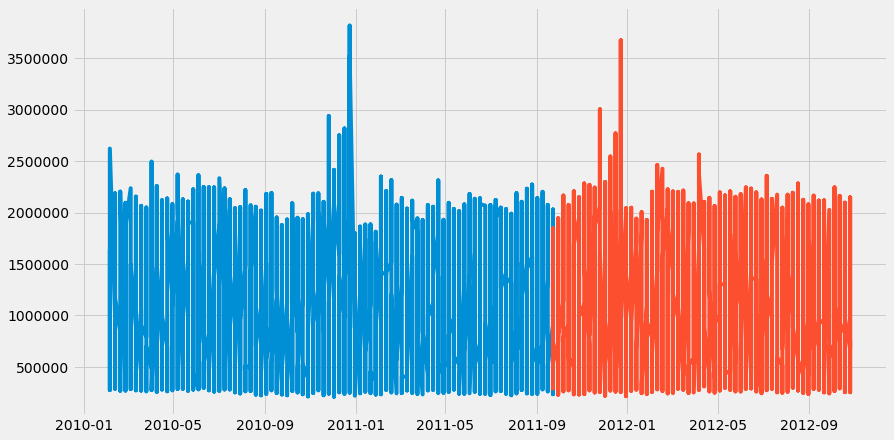

In [5]:
# Let's take a look at our data and its shape
train.shape, test.shape, viz.plot_split(train, test)

## EDA 

In [6]:
# Establish target for prediction
# We want to predict weekly sales. Moving forward, we will learn about trends in data 
y = df.weekly_sales

<AxesSubplot:ylabel='Frequency'>

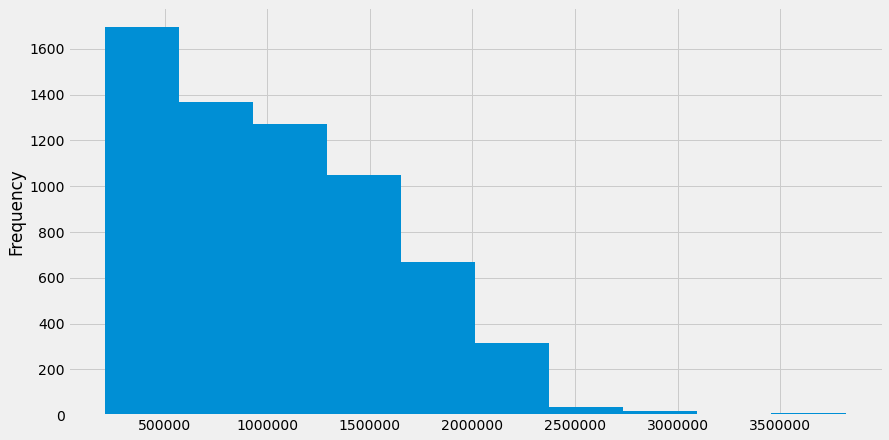

In [7]:
# Target is normally distributed  
y.plot.hist()

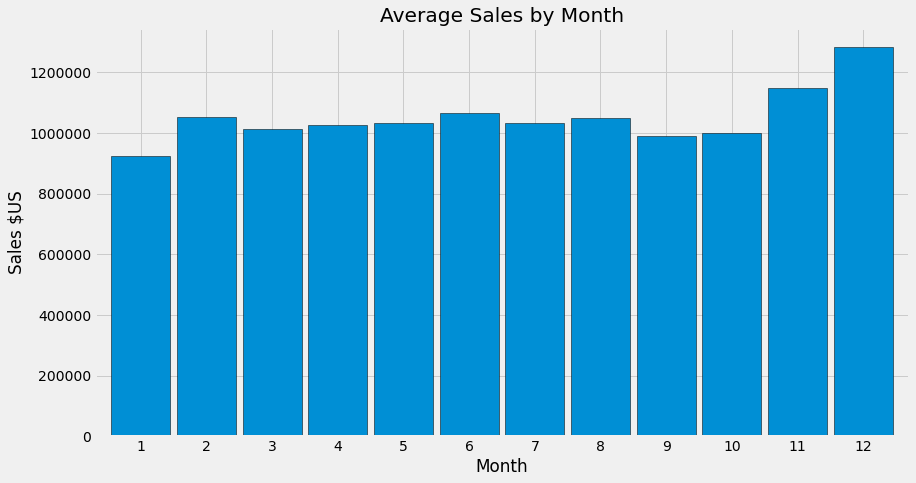

In [8]:
viz.target_average_sales_by_month(y)

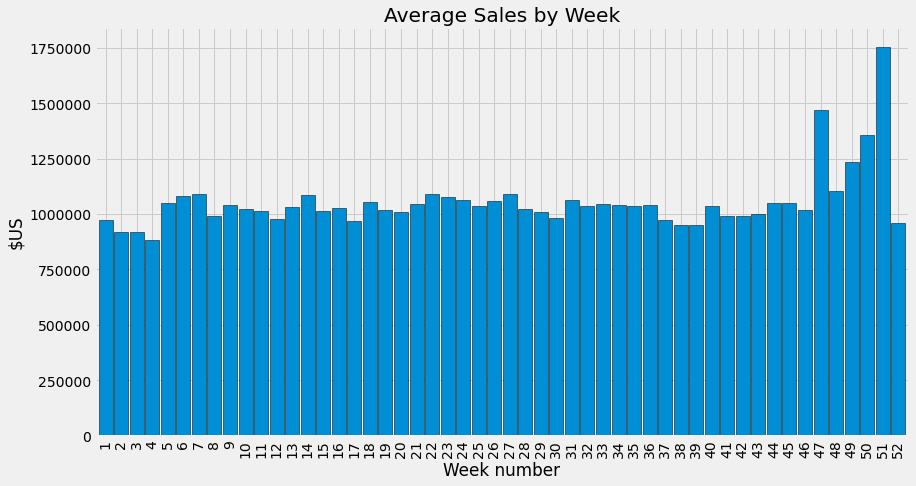

In [9]:
viz.target_average_sales_by_week(y)

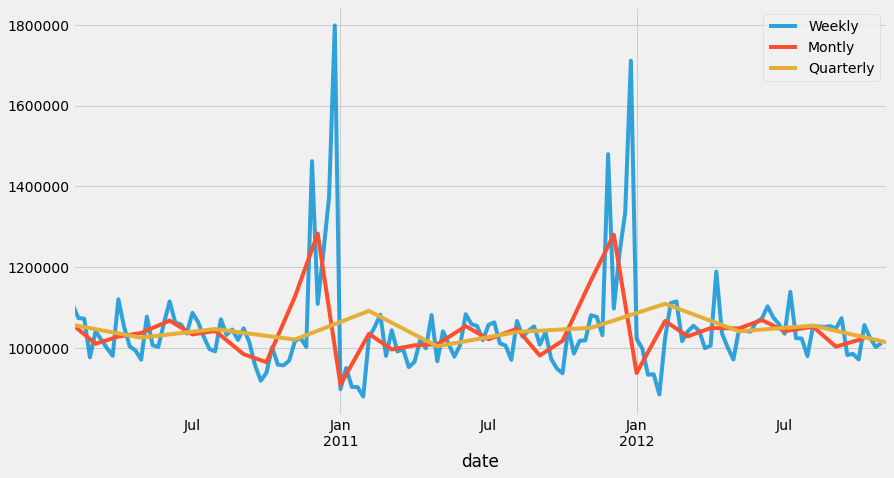

In [10]:
viz.week_month_quarter_running_average(y)

# Takeaway
- Seasonality is evident for November, December, and January
- Normal distribution can be observed
- Week 47 shows seasonality (coincides with Black Friday)
- From the first week of February, sales start to pick up
- Second-quarter seems to have a drop in sales to pick up in summer

--------------

# Modeling/ Forecasting

In [11]:
# Function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    """
    Append evaluation metrics for each model type, target variable, and metric 
    type, along with the metric value, into our eval_df data frame object. Which 
    we will create an empty eval_df data frame object to start.
    """
    rmse = model.evaluate(train, yhat_df, target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [12]:
#target_var
target_var = 'weekly_sales' 

In [13]:
# plots train adn test 
def plot_samples():
    for col in train.columns:
        plt.figure(figsize=(12,4))
        plt.plot(train[target_var])
        plt.plot(test[target_var])
        plt.title(target_var)

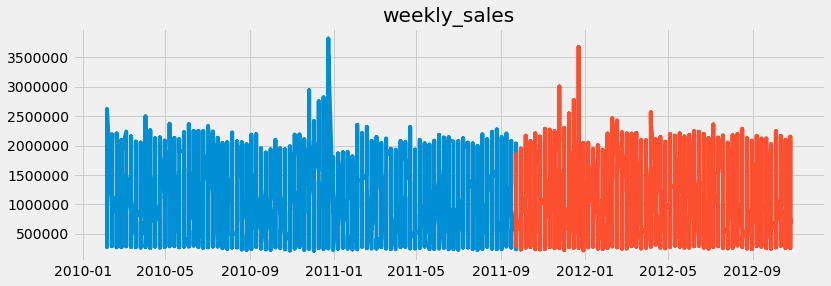

In [14]:
plot_samples()

In [15]:
# Create an empty data frame where all the results of the models will go  
eval_df = model.evaluate_data_frame()

----------------
following functions will allow the plottion of predictions by model 

In [16]:
def plot_model(model_type):
    '''
    Function plots the models predictions calculating RMSE
    '''
    for col in train.columns:
        eval_df = append_eval_df(model_type, target_var = col)
        plt.plot(train[target_var])
        plt.plot(test[target_var])
        plt.title(model_type)
        plt.plot(yhat_df[target_var])
        rmse = model.evaluate(train, yhat_df, target_var)
        print(target_var, '--RMSE: {:.0f}'.format(rmse))


In [17]:
# Function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    """
    Append evaluation metrics for each model type, target variable, and metric 
    type, along with the metric value, into our eval_df data frame object. Which 
    we will create an empty eval_df data frame object to start.
    """
    rmse = model.evaluate(train, yhat_df, target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

## Last Observed Value
Predicts all future values to be the last observed value.



In [18]:
# Predicions
# create variable 'weekly_sales' with last observed value
weekly_sales = train['weekly_sales'][-1]

# make predictions by adding weekly_sales to new dataframe yhat_df
yhat_df = pd.DataFrame({'weekly_sales' : [weekly_sales]}, 
                       index = train.index)

In [19]:
def plot_model(model_type):
    '''
    Function plots the models predictions calculating RMSE
    '''
    for col in train.columns:
        eval_df = append_eval_df(model_type, target_var = col)
        plt.plot(train[target_var])
        plt.plot(test[target_var])
        plt.title(model_type)
        plt.plot(yhat_df[target_var])
        rmse = model.evaluate(train, yhat_df, target_var)
        print(target_var, '--RMSE: {:.0f}'.format(rmse))


In [20]:
def plot_model(model_type):
    '''
    Function plots the models predictions calculating RMSE
    '''
    for col in train.columns:
        eval_df = append_eval_df(model_type, target_var = col)
        plt.plot(train[target_var])
        plt.plot(test[target_var])
        plt.title(model_type)
        plt.plot(yhat_df[target_var])
        rmse = model.evaluate(train, yhat_df, target_var)
        print(target_var, '--RMSE: {:.0f}'.format(rmse))


weekly_sales --RMSE: 655762


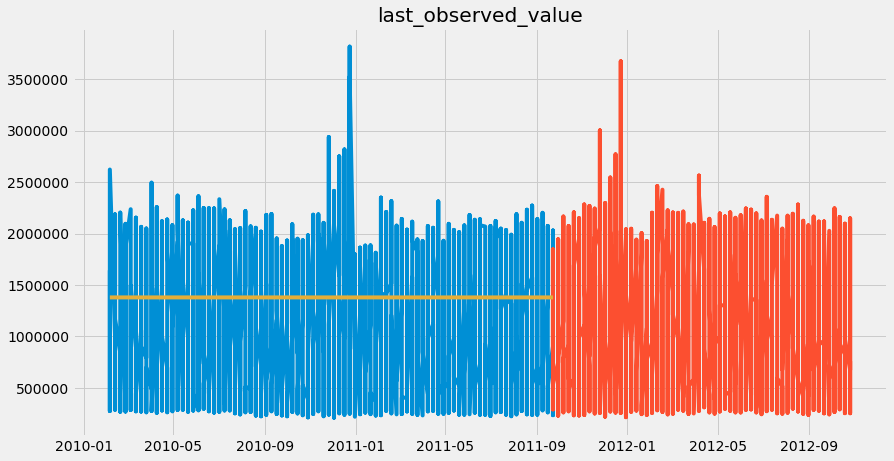

In [21]:
model_type = 'last_observed_value'
plot_model(model_type)

In [22]:
# Function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    """
    Append evaluation metrics for each model type, target variable, and metric 
    type, along with the metric value, into our eval_df data frame object. Which 
    we will create an empty eval_df data frame object to start.
    """
    rmse = model.evaluate(train, yhat_df, target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [23]:
eval_df = append_eval_df(model_type, target_var)


In [24]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,weekly_sales,655762.0


## Simple Average
Take the simple average of historical values and use that value to predict future values.

In [25]:
# Predicions
# create var 'weekly_sales' with last observed value
weekly_sales = round(train['weekly_sales'].mean(), 2)

In [26]:
yhat_df = pd.DataFrame({'weekly_sales': [weekly_sales]}, index = train.index)

weekly_sales --RMSE: 559047


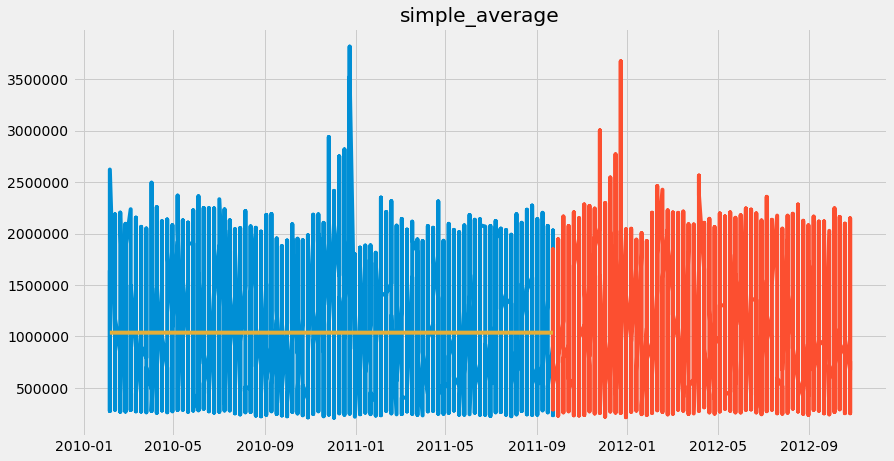

In [27]:
model_type = 'simple_average'
plot_model(model_type)

In [28]:
eval_df = append_eval_df(model_type, target_var)

In [29]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,weekly_sales,655762.0
1,simple_average,weekly_sales,559047.0


## Moving Average
We will use a 4 weeks moving average to forecast. In other words, the average over the last month will be used as the forecasted value.

In [30]:
model_type = 'moving_average'

""" 
Calculates the moving Average for multiple piriods of time
"""

periods = [1, 4, 12, 26, 42, 52, 104] # Weeks

for p in periods:
    # use the rolling method, take the rolling mean of 1, 16, 26, and 42 weeks, and select the last value, i.e. the last day in train. 
    # round to 2 decimals
    weekly_sales = round(train['weekly_sales'].rolling(p).mean().iloc[-1], 2)

    # create a new yhat data frame with the forecast through test dates
    yhat_df = pd.DataFrame({'weekly_sales': [weekly_sales]}, index = train.index)

    # append results to the eval_df
    # plot the forecasts
    model_type = str(p) + '_week_moving_average'
    eval_df = append_eval_df(model_type, target_var)

In [31]:
model_type = 'moving_median'
""" 
Calculates the moving Mean for multiple piriods of time
"""

periods = [1, 4, 12, 26, 42, 52, 104] # Weeks

for p in periods:
    # use the rolling method, take the rolling mean of 1, 16, 26, and 42 weeks, and select the last value, i.e. the last day in train. 
    # round to 2 decimals
    weekly_sales = round(train['weekly_sales'].rolling(p).median().iloc[-1], 2)

    # create a new yhat data frame with the forecast through test dates
    yhat_df = pd.DataFrame({'weekly_sales': [weekly_sales]}, index = train.index)

    # append results to the eval_df
    # plot the forecasts
    model_type = str(p) + '_week_moving_median'
    eval_df = append_eval_df(model_type, target_var)

In [32]:
# Evaluation data frame contains the results of all the models used
eval_df

,model_type,target_var,rmse
0,last_observed_value,weekly_sales,655762.0
1,simple_average,weekly_sales,559047.0
2,1_week_moving_average,weekly_sales,655762.0
3,4_week_moving_average,weekly_sales,640164.0
4,12_week_moving_average,weekly_sales,559139.0
5,26_week_moving_average,weekly_sales,559852.0
6,42_week_moving_average,weekly_sales,560229.0
7,52_week_moving_average,weekly_sales,560215.0
8,104_week_moving_average,weekly_sales,564558.0
9,1_week_moving_median,weekly_sales,655762.0


## Modeling Conclusion
### Which model did the best?

In [33]:
model.best_model(eval_df)

,model_type,target_var,rmse
1,simple_average,weekly_sales,559047.0


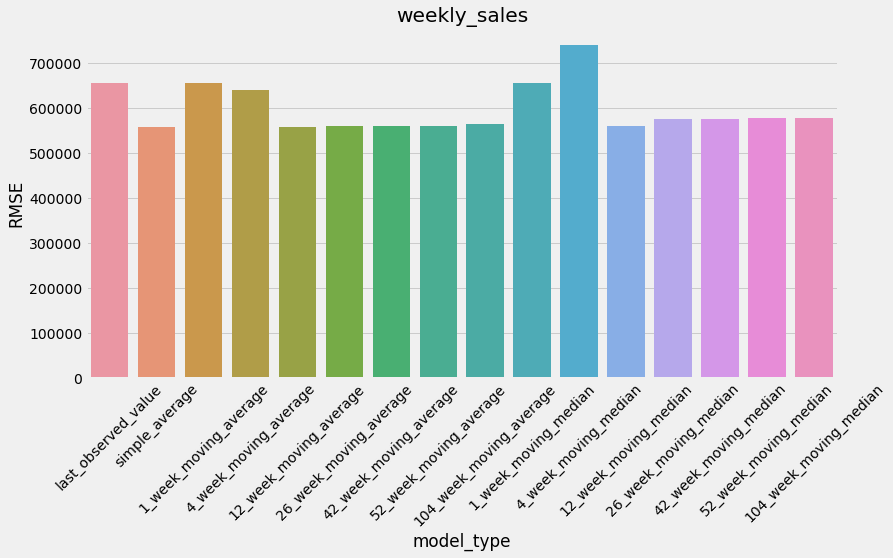

In [34]:
for col in train.columns:
    x = eval_df[eval_df.target_var == col]['model_type']
    y = eval_df[eval_df.target_var == col]['rmse']
    plt.figure(figsize=(12, 6))
    sns.barplot(x, y)
    plt.title(col)
    plt.ylabel('RMSE')
    plt.xticks(rotation=45)
    plt.show()

## Takeawya:
The lower the RMSE, the better the model. Also, the model should have close proximity with the training & testing scores. It can be said that simple average time series model gave us the best results.

## Let's test it out on our out-of-sample data

In [35]:
# Must use the same parameters we used from train
yhat_df = test + train.diff(365).mean()
# Set index to that of test
yhat_df.index = test.index

In [36]:
rmse_weekly_sales = round(sqrt(mean_squared_error(test['weekly_sales'], yhat_df['weekly_sales'])), 0)


In [37]:
# Plot and evaluate train, and test
def plot_and_eval_test(target_var):
    plt.plot(train[target_var], label = 'Train', linewidth = 3, alpha = .8)
    plt.plot(test[target_var], label = 'Test', linewidth = 5)
    plt.plot(yhat_df[target_var], alpha = .5, color="blue")
    plt.title(target_var)
    plt.legend()
    plt.show()

rmse - weekly_sales:  1694.0


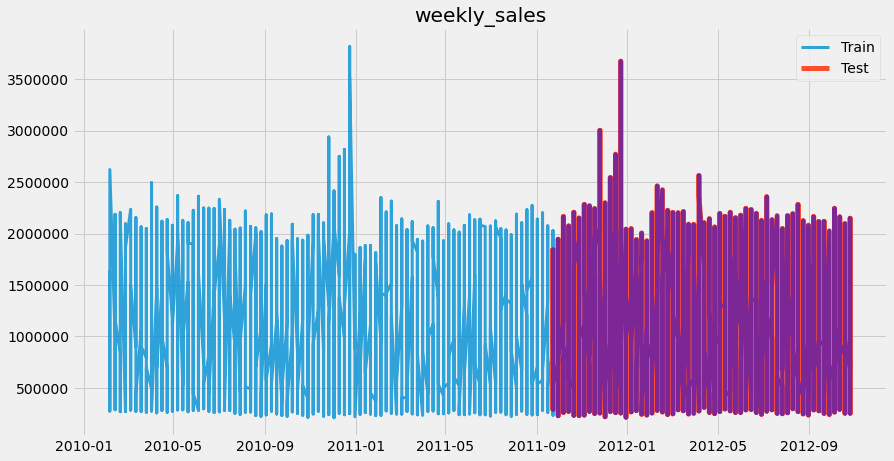

In [38]:
print("rmse - weekly_sales: ", rmse_weekly_sales)

for col in test.columns:
    plot_and_eval_test(col)

# Key findings and Recomendations

- Running a simple average is a handy tool that could make forecasting at Walmart more simple for leadership

- Christmas and Black Friday are the best seasons for the stores.

- January and September are the months with fewer sales of the year

- We would want to get a data set that has at least three years worth of data so that we perform other time series analysis  algorithms such as Holts Linear Trend and Previous cycle 

- If I had more time, I would analyze stores individually to see if some of them experience a different type of seasonality 

- Run regression models that will allow us to understand how different stores react to gas price changes, temperature changes, and unemployment changes

# Thank You!